In [18]:
!which python

/home/lhwilli/miniconda3/envs/medcv/bin/python


In [19]:
!pip list

Package                    Version
-------------------------- --------------
albucore                   0.0.24
albumentations             2.0.6
annotated-types            0.7.0
anyio                      4.9.0
argon2-cffi                23.1.0
argon2-cffi-bindings       21.2.0
arrow                      1.3.0
asttokens                  3.0.0
async-lru                  2.0.5
attrs                      25.3.0
babel                      2.17.0
beautifulsoup4             4.13.4
bleach                     6.2.0
Brotli                     1.1.0
cached-property            1.5.2
certifi                    2025.4.26
cffi                       1.17.1
charset-normalizer         3.4.2
comm                       0.2.2
contourpy                  1.3.2
cycler                     0.12.1
debugpy                    1.8.14
decorator                  5.2.1
defusedxml                 0.7.1
exceptiongroup             1.2.2
executing                  2.2.0
fastjsonschema             2.21.1
filelock          

In [20]:
import nibabel as nib
import nilearn as nil
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import numpy as np
import os

In [21]:
#We load one of our training images via NiBabel
t1_scan = nib.load('data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1.nii')

# What is the type of this object?
type(t1_scan)

nibabel.nifti1.Nifti1Image

In [22]:
print(t1_scan.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 0.0
qoffset_y       : 239.0
qoffset_z       : 0.0
srow_x          : [-1. -0. -0.  0.]
srow_y          : 

In [23]:
#we get the floating point data of the image
t1_scan_data = t1_scan.get_fdata()
type(t1_scan_data)

numpy.memmap

In [7]:
t1_scan_data.shape

(240, 240, 155)

In [8]:
#now lets do this for a segmented image
#We load one of our training images via NiBabel
seg_scan = nib.load('data/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_seg.nii')

# What is the type of this object?
type(seg_scan)
print('\n')
print(seg_scan.header)
print('\n')
#we get the floating point data of the image
seg_scan_data = seg_scan.get_fdata()
type(seg_scan_data)
#and the shape
seg_scan_data.shape



<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 0.0
qoffset_y       : 239.0
qoffset_z       : 0.0
srow_x          : [-1. -0. -0.  0.]
srow_y          :

(240, 240, 155)

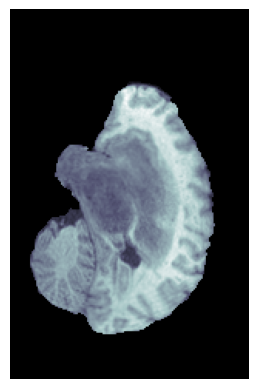

In [9]:
#visualize MRI data
plt.imshow(t1_scan_data[96], cmap='bone')
plt.axis('off')
plt.show()

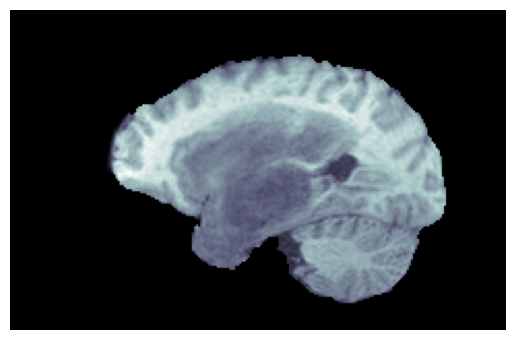

In [10]:
#we can rotate the image to see it better
plt.imshow(ndi.rotate(t1_scan_data[96], 90), cmap='bone')
plt.axis('off')
plt.show()

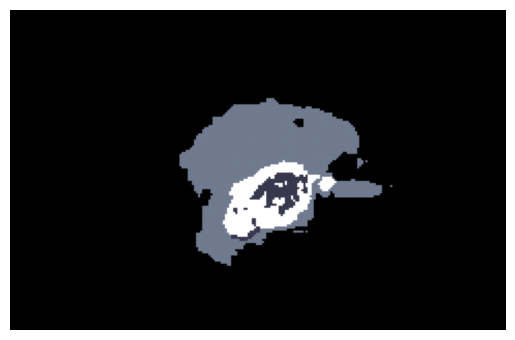

In [11]:
#segmented image...
plt.imshow(ndi.rotate(seg_scan_data[96], 90), cmap='bone')
plt.axis('off')
plt.show()

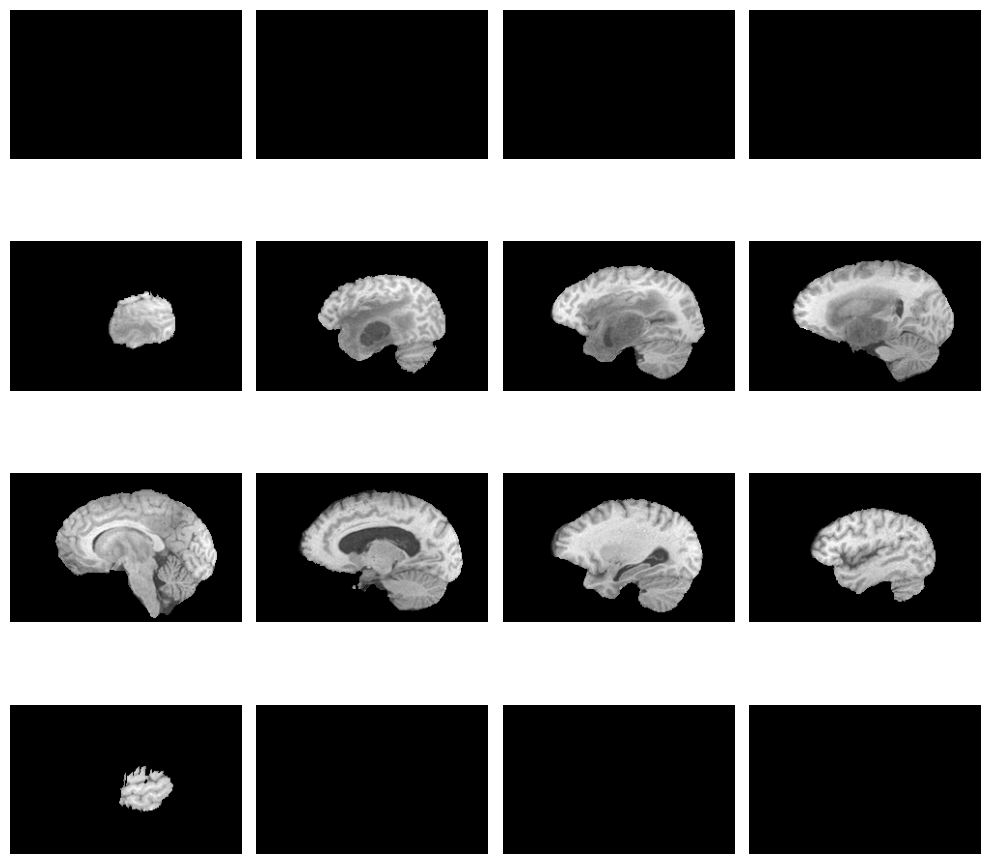

In [12]:
#recall we are working with 3D images... Lets visualize all the slices of this image
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols #total number of images we will show, each image is a subplot
n_slice = t1_scan_data.shape[0] #n_slize is a 3D numpy array, .shape[0] gives the number of slices along first axis
step_size = n_slice // n_subplots #we divide our scan into 16 chunks
plot_range = n_subplots * step_size #this line an next center the plotted slices
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10]) #create grid of 16 subplot

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(t1_scan_data[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()

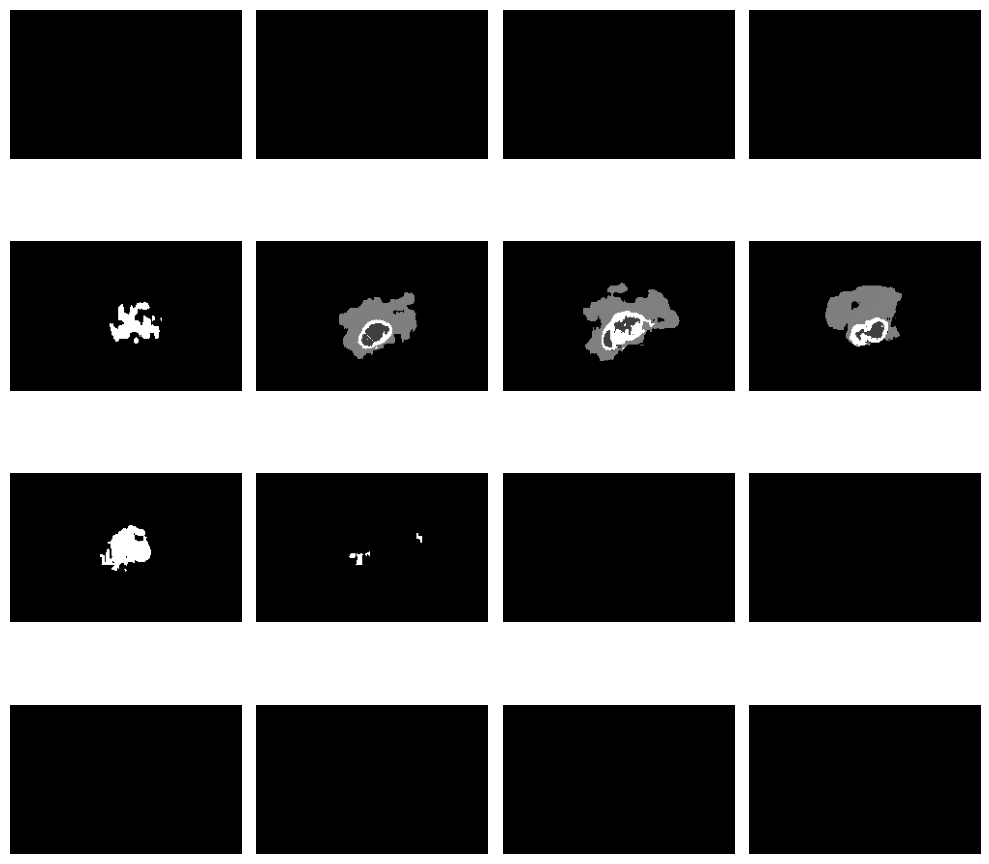

In [13]:
#segmented image...
fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols #total number of images we will show, each image is a subplot
n_slice = seg_scan_data.shape[0] #n_slize is a 3D numpy array, .shape[0] gives the number of slices along first axis
step_size = n_slice // n_subplots #we divide our scan into 16 chunks
plot_range = n_subplots * step_size #this line an next center the plotted slices
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10]) #create grid of 16 subplot

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(seg_scan_data[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()

In [14]:
np.unique(seg_scan_data)

array([0., 1., 2., 4.])

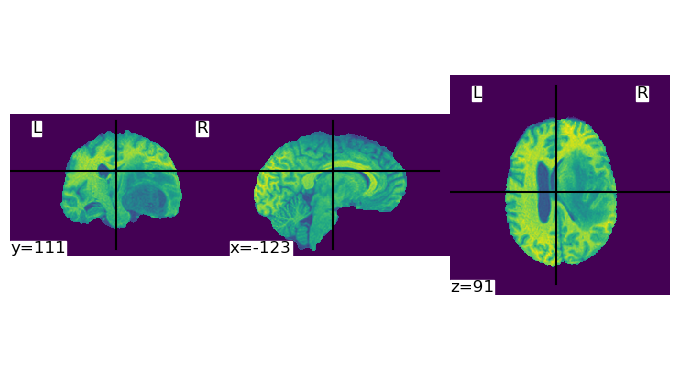

In [15]:
#NiLearn is purpose-built for working with brain images, so it is easy to use for plotting our image, even easier than what we just did.
from nilearn import plotting

plotting.plot_img(t1_scan)
plt.show()

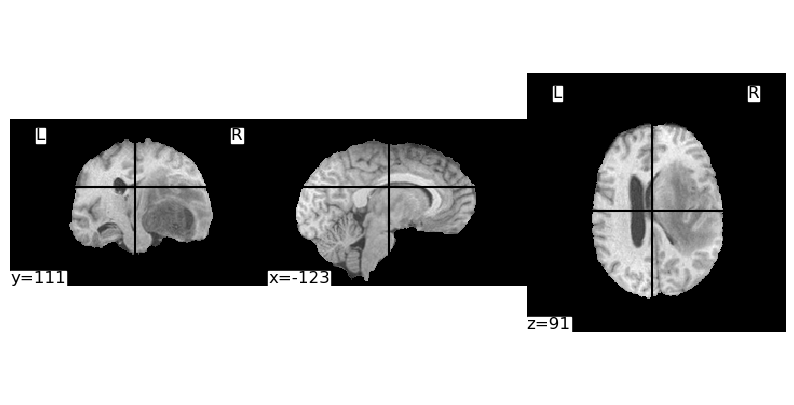

In [16]:
#NiLearn is built on MatPlotLib so we can use typical tricks to adjust the image
#here we adjust the size and colormap
from nilearn import plotting

fig, ax = plt.subplots(figsize=[10, 5])
plotting.plot_img(t1_scan, cmap='gray', axes=ax)
plt.show()

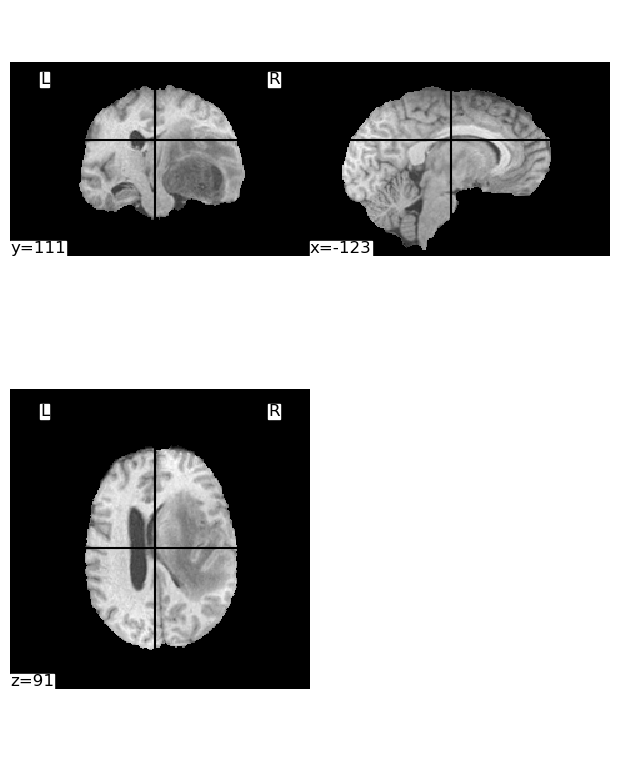

In [17]:
#another example of plot_img
plotting.plot_img(t1_scan, display_mode='tiled', cmap='gray')
plt.show()